# 250225-6-2

## Imports

In [28]:
import pickle
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, inconsistent
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

## Load

In [29]:
# .pkl 파일에서 불러오기
with open("./data/data.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# 변수 개별 할당
y = data_loaded["y"]
yU = data_loaded["yU"]
yP = data_loaded["yP"]
t = data_loaded["t"]
regions = data_loaded["regions"]

## yU_corr

태풍 힌남노는 2022년 9월 4일에 발생하여 9월 7일까지 영향을 미쳤습니다. 주로 한반도와 일본, 중국 근처를 지나면서 강한 바람과 비를 동반했죠. 실제로 한국에서는 많은 피해가 있었고, 특히 경상도 지역에 큰 영향을 미쳤습니다.

<https://namu.wiki/w/%ED%9E%8C%EB%82%A8%EB%85%B8>

In [ ]:
# 예제 데이터를 생성
date_range = pd.date_range(start="2022-09-01", end="2022-09-15", freq="H")

# 지역명을 생성 (예시: "Location 1", "Location 2", ..., "Location 44")
region_names = regions

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-09-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]

# 지역별 상관 행렬 계산
yU_corr = np.corrcoef(yU.T)  # 44*44 상관 행렬 계산

## 최적의 k

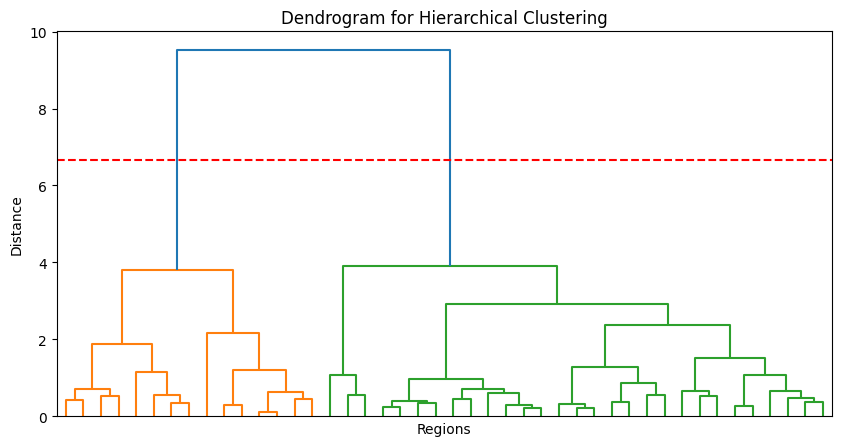

             Method  Optimal k
0      Elbow Method          9
1  Silhouette Score          2
2        Dendrogram          2


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# 거리 행렬 변환 및 계층적 군집 수행
dist_matrix = pdist(yU_corr)
Z = linkage(dist_matrix, method="ward")

# 1. 엘보우 기법 (Elbow Method)
sse = []
k_range = range(2, 11)
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    intra_cluster_var = np.sum([np.var(yU_corr[clusters == i]) for i in np.unique(clusters)])
    sse.append(intra_cluster_var)

optimal_k_elbow = k_range[np.argmin(np.diff(sse)) + 1]

# 2. 실루엣 분석 (Silhouette Analysis)
best_k_silhouette = 2
best_score = -1
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(yU_corr, clusters)
    if score > best_score:
        best_score = score
        best_k_silhouette = k

# 3. 덴드로그램 분석 (Dendrogram Analysis) - 자동 기준선 선택
max_d = 0.7 * np.max(Z[:, 2])  # 병합 거리 중 최댓값의 70%를 기준선으로 설정
plt.figure(figsize=(10, 5))
dendrogram(Z, no_labels=True, color_threshold=max_d)
plt.axhline(y=max_d, color='r', linestyle='--')  # 최적의 y 기준선 자동 설정
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Regions")
plt.ylabel("Distance")
plt.show()

# 자동으로 선택한 y 기준선을 사용하여 군집 개수 선택
optimal_k_dendrogram = len(np.unique(fcluster(Z, max_d, criterion="distance")))

# 최적 k 값 정리
optimal_k_values = {
    "Elbow Method": optimal_k_elbow,
    "Silhouette Score": best_k_silhouette,
    "Dendrogram": optimal_k_dendrogram  # 자동으로 선택된 군집 개수
}

# k 값 정리 및 출력
df_k_values = pd.DataFrame(list(optimal_k_values.items()), columns=["Method", "Optimal k"])
print(df_k_values)


<Figure size 1500x1200 with 0 Axes>

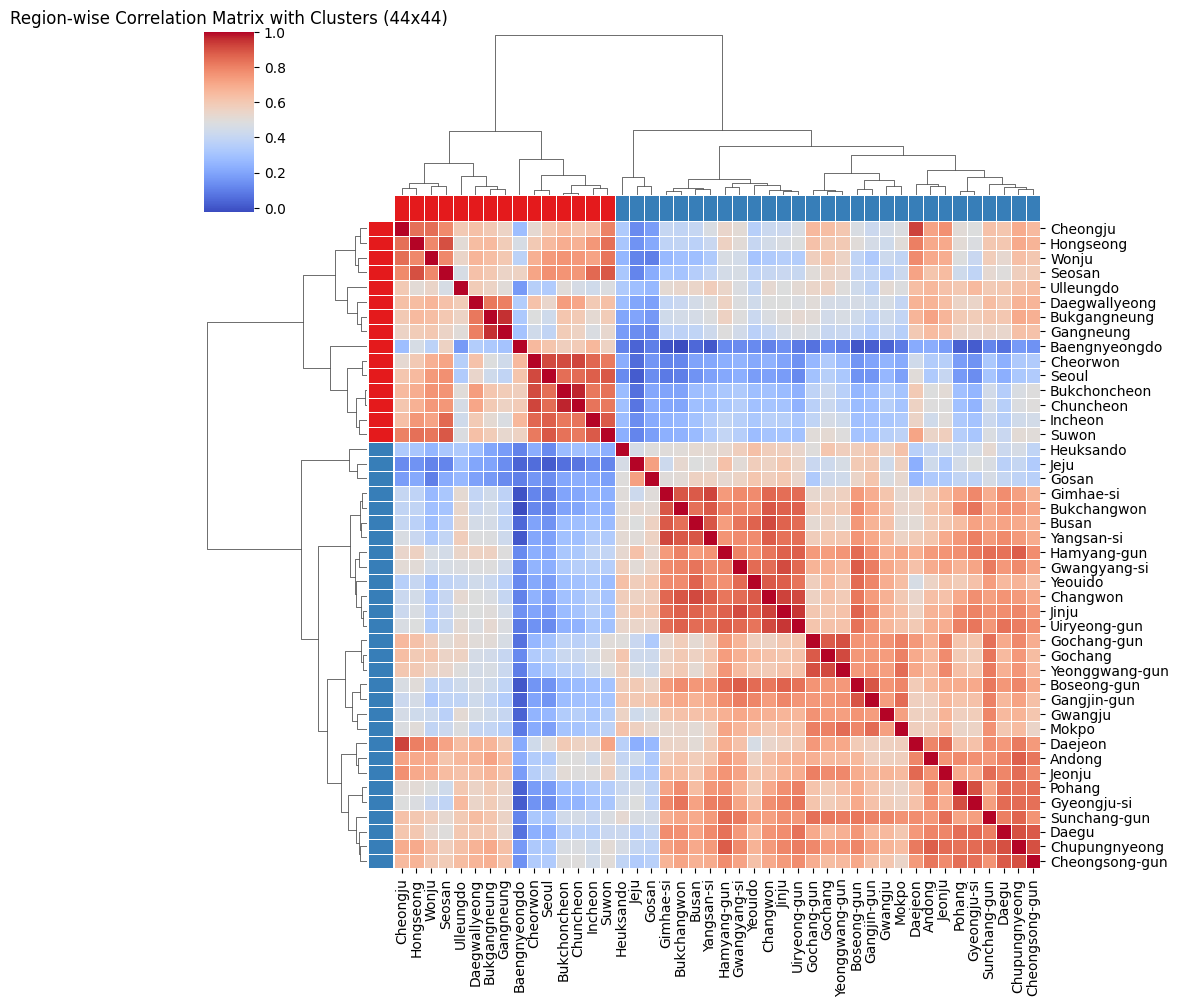

In [38]:
# 계층적 군집 분석을 사용하여 2개의 군집으로 분할
Z = linkage(yU_corr, method='ward')
clusters = fcluster(Z, 2, criterion='maxclust')  # 3개의 클러스터 생성

# 클러스터 색상을 매핑할 팔레트 정의
cluster_colors = sns.color_palette("Set1", 2)
row_colors = [cluster_colors[i-1] for i in clusters]  # 클러스터 인덱스에 맞춰 색상 적용

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(15, 12))
sns.clustermap(yU_corr, cmap='coolwarm', row_colors=row_colors, col_colors=row_colors, xticklabels=region_names, yticklabels=region_names, linewidths=0.5, method='ward')
plt.title("Region-wise Correlation Matrix with Clusters (44x44)")
plt.show()

<Figure size 1500x1200 with 0 Axes>

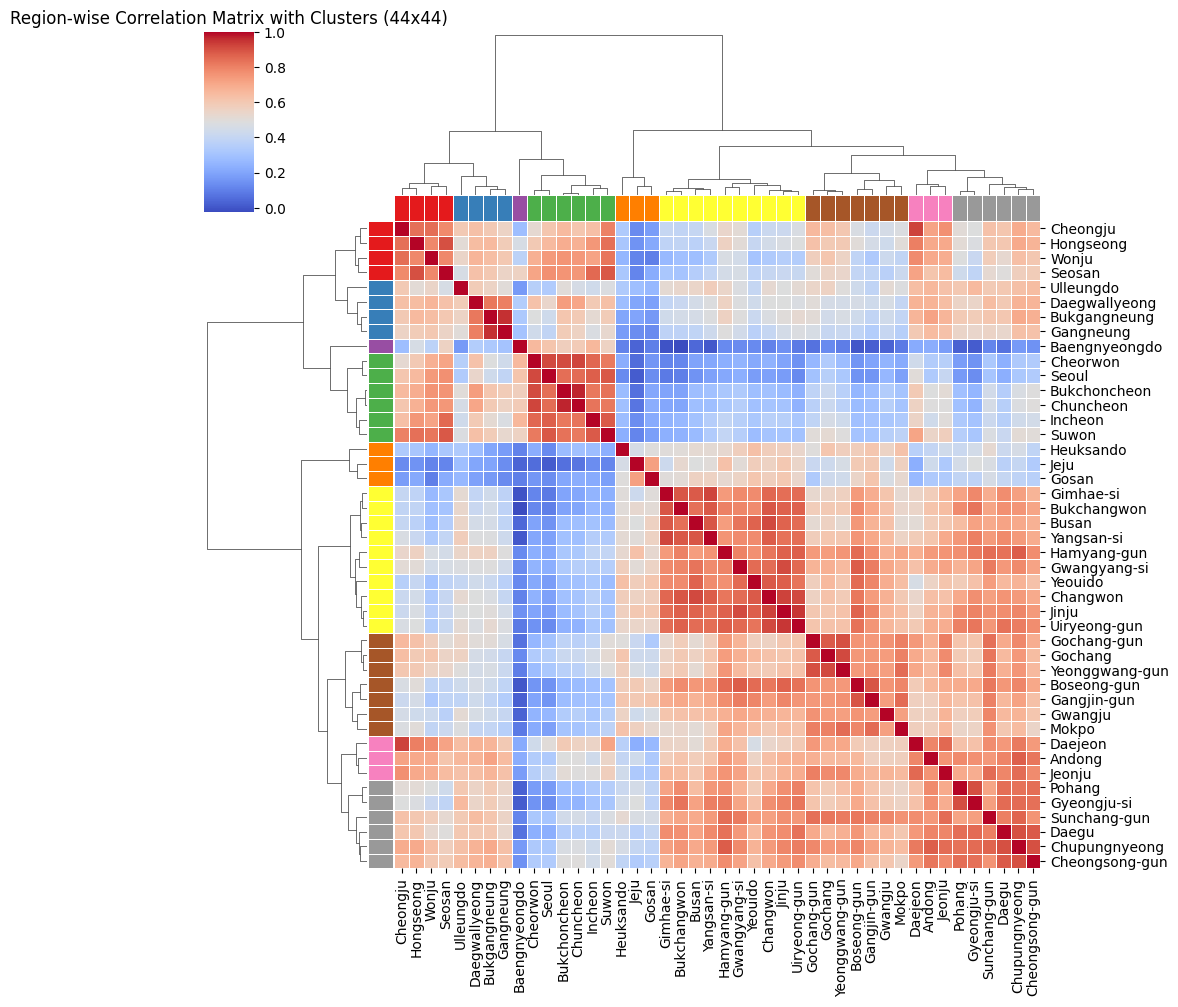

In [43]:
# 계층적 군집 분석을 사용하여 2개의 군집으로 분할
Z = linkage(yU_corr, method='ward')
clusters = fcluster(Z, 9, criterion='maxclust')  # 3개의 클러스터 생성

# 클러스터 색상을 매핑할 팔레트 정의
cluster_colors = sns.color_palette("Set1", 9)
row_colors = [cluster_colors[i-1] for i in clusters]  # 클러스터 인덱스에 맞춰 색상 적용

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(15, 12))
sns.clustermap(yU_corr, cmap='coolwarm', row_colors=row_colors, col_colors=row_colors, xticklabels=region_names, yticklabels=region_names, linewidths=0.5, method='ward')
plt.title("Region-wise Correlation Matrix with Clusters (44x44)")
plt.show()

In [42]:
# 예제 데이터를 생성
date_range = pd.date_range(start="2022-09-01", end="2022-09-15", freq="H")

# 지역명을 생성 (예시: "Location 1", "Location 2", ..., "Location 44")
region_names = regions

# 9월 1일부터 9월 15일까지의 데이터 필터링
start_date = "2022-09-01"
end_date = "2022-09-15"
filtered_t = t[(t >= start_date) & (t <= end_date)]
filtered_y = y[(t >= start_date) & (t <= end_date), :]

# 지역별 상관 행렬 계산
yU_corr = np.corrcoef(yU.T)  # 44*44 상관 행렬 계산

# 엘보우 기법을 사용하여 최적의 군집 개수 선택
dist_matrix = pdist(yU_corr)
Z = linkage(dist_matrix, method="ward")
sse = []
k_range = range(2, 11)
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    intra_cluster_var = np.sum([np.var(yU_corr[clusters == i]) for i in np.unique(clusters)])
    sse.append(intra_cluster_var)

# SSE 기울기 변화를 기반으로 최적 k 찾기
diff_sse = np.diff(sse)
optimal_k = k_range[np.argmin(diff_sse) + 1]  # 가장 큰 감소가 일어나는 지점 선택

# 최적의 k로 군집 생성
clusters = fcluster(Z, optimal_k, criterion='maxclust')

# 군집별 지역 그룹화
grouped_regions = {i: [] for i in range(1, optimal_k + 1)}
for idx, cluster in enumerate(clusters):
    grouped_regions[cluster].append(region_names[idx])

# 군집별 지역 출력
for cluster_id, region_list in grouped_regions.items():
    print(f"Cluster {cluster_id}: {', '.join(region_list)}")


Cluster 1: Wonju, Seosan, Cheongju, Hongseong
Cluster 2: Daegwallyeong, Bukgangneung, Gangneung, Ulleungdo
Cluster 3: Bukchoncheon, Cheorwon, Chuncheon, Seoul, Incheon, Suwon
Cluster 4: Baengnyeongdo
Cluster 5: Heuksando, Jeju, Gosan
Cluster 6: Changwon, Busan, Yeouido, Jinju, Gimhae-si, Bukchangwon, Yangsan-si, Uiryeong-gun, Hamyang-gun, Gwangyang-si
Cluster 7: Gwangju, Mokpo, Gochang, Gochang-gun, Yeonggwang-gun, Boseong-gun, Gangjin-gun
Cluster 8: Daejeon, Andong, Jeonju
Cluster 9: Chupungnyeong, Pohang, Daegu, Sunchang-gun, Cheongsong-gun, Gyeongju-si


:::{.callout-note}
# 군집 분석 및 최적 군집 개수 선택 방법

## 1. 군집 분석 방법

본 연구에서는 **계층적 군집 분석 (Hierarchical Clustering)** 기법을 활용하여 지역 간 유사성을 기반으로 군집을 형성하였다. 계층적 군집 분석은 데이터 포인트 간의 유사도를 기반으로 계층적 구조를 형성하며, 병합(agglomerative) 방식과 분할(divisive) 방식으로 나뉜다. 본 분석에서는 병합 방식 중에서도 가장 널리 사용되는 **Ward’s Method**를 적용하였다.

### **Ward’s Method**
Ward’s Method는 군집 내의 분산 증가를 최소화하는 방식으로 데이터를 병합하는 알고리즘이다. 이 방법은 다른 계층적 군집 방법보다 더 균형 잡힌 군집을 형성하는 장점이 있다. 두 개의 군집을 병합할 때, 군집 내 제곱오차(SSE, Sum of Squared Errors)가 가장 적게 증가하는 쌍을 선택하여 병합한다. 이를 통해 보다 안정적이고 의미 있는 군집이 형성된다.

군집 분석을 수행하기 위해 **상관 행렬 (Correlation Matrix)** 을 기반으로 유사도를 계산하였다. 상관 행렬은 각 지역 간의 관계를 정량적으로 평가하는 지표로 활용되었으며, 이를 거리 행렬로 변환한 후 계층적 군집 분석을 적용하였다.


## 2. 최적 군집 개수(k) 선택 방법

군집 개수를 자동으로 결정하는 것은 매우 중요한 과정이다. 본 연구에서는 **Elbow Method, Silhouette Score, Dendrogram Analysis** 등 세 가지 방법을 활용하여 최적의 군집 개수를 선택하였다.

### **(1) 엘보우 기법 (Elbow Method)**
엘보우 기법은 군집 개수(k)에 따른 **군집 내 응집도 (Within-Cluster Sum of Squares, WCSS)** 또는 **SSE(Sum of Squared Errors)** 의 변화를 분석하여 최적의 k 값을 선택하는 방법이다. 

- 군집 개수를 증가시키면 SSE가 감소하지만, 어느 순간부터 감소율이 완만해지는 지점이 발생한다.
- 이 완만해지는 지점을 **엘보우(Elbow, 팔꿈치) 지점**이라 하며, 이 지점의 k 값을 최적 군집 개수로 선택한다.
- 본 연구에서는 **2~10개의 군집**을 설정하여 SSE 값을 계산하였으며, SSE 감소율이 급격히 변하는 지점을 k 값으로 선정하였다.

### **(2) 실루엣 분석 (Silhouette Analysis)**
실루엣 분석은 각 데이터 포인트가 속한 군집 내에서 얼마나 밀집되어 있는지를 측정하는 방법으로, 실루엣 계수(Silhouette Score)를 기반으로 한다. 실루엣 계수는 **-1에서 1 사이의 값을 가지며**, 다음과 같이 해석할 수 있다.

- 1에 가까울수록 해당 데이터 포인트가 올바르게 군집화됨
- 0에 가까울수록 경계에 위치한 데이터 포인트
- 음수일 경우 잘못된 군집에 할당된 경우

군집 개수를 2~10으로 설정하고, 각각의 k 값에서 실루엣 계수를 계산한 후 **가장 높은 실루엣 점수를 가지는 k 값을 최적 k 값**으로 선택하였다.

### **(3) 덴드로그램 분석 (Dendrogram Analysis)**
덴드로그램은 계층적 군집 분석의 결과를 트리 형태로 시각화하는 방법으로, 군집이 병합되는 과정을 보여준다. 

- 특정 **거리 임계값(distance threshold)** 에서 수평선을 그려 군집을 나눈다.
- 본 연구에서는 수동으로 임계값을 설정하는 대신, **전체 병합 거리의 70%를 기준선**으로 설정하여 자동으로 최적 k 값을 선택하였다.
- 이 방법을 통해 자연스럽게 클러스터의 개수가 결정되며, 과도한 세분화를 방지할 수 있다.


## 3. 시각화 결과 설명

### **(1) 그림 1: 기본 클러스터링 기반 상관 행렬**
첫 번째 그림은 **군집 분석을 적용한 상관 행렬(44×44)** 을 나타낸다. 
- 이 행렬은 지역 간 상관관계를 히트맵으로 표현하며, 상관 계수 값에 따라 **붉은색(양의 상관관계), 파란색(음의 상관관계), 중간색(약한 상관관계)** 으로 나타난다.
- 덴드로그램을 활용하여 계층적 군집 분석을 수행하였으며, **군집 개수(k)는 자동으로 선택**되었다.
- 이 그래프를 통해 유사한 환경적 특성을 가진 지역들이 어떻게 그룹화되는지를 확인할 수 있다.

### **(2) 그림 2: 군집별 색상 적용된 상관 행렬**
두 번째 그림은 **군집별 색상을 적용하여 클러스터를 더욱 직관적으로 표현한 상관 행렬**이다.
- 군집별 색상을 추가하여 덴드로그램과 연계된 정보가 더욱 명확하게 나타나도록 개선되었다.
- 같은 색상의 행과 열은 서로 유사한 환경적 특성을 가지는 지역들을 의미하며, 군집 간 관계를 쉽게 파악할 수 있다.
- 상단과 좌측의 덴드로그램은 **자동으로 군집을 형성하며, 같은 클러스터 내의 지역들을 한눈에 파악할 수 있도록 도와준다.**

이 두 가지 시각화는 각각의 목적에 따라 활용될 수 있으며, **군집 기반 상관 행렬 분석을 통해 지역 간 유사성을 효과적으로 탐색**할 수 있도록 한다.
:::